In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape for CNN
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [19]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

model.fit(x_train, y_train, epochs=5, validation_split=0.1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 54s 30ms/step - accuracy: 0.8911 - loss: 0.3525 - val_accuracy: 0.9847 - val_loss: 0.0554
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 48s 29ms/step - accuracy: 0.9830 - loss: 0.0556 - val_accuracy: 0.9845 - val_loss: 0.0521
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.9892 - loss: 0.0348 - val_accuracy: 0.9897 - val_loss: 0.0354
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 28ms/step - accuracy: 0.9918 - loss: 0.0253 - val_accuracy: 0.9902 - val_loss: 0.0368
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 47s 28ms/step - accuracy: 0.9942 - loss: 0.0178 - val_accuracy: 0.9892 - val_loss: 0.0405


In [20]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

# Save model
model.save('../models/mnist_model.h5')


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9851 - loss: 0.0443


Test Accuracy: 0.99


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


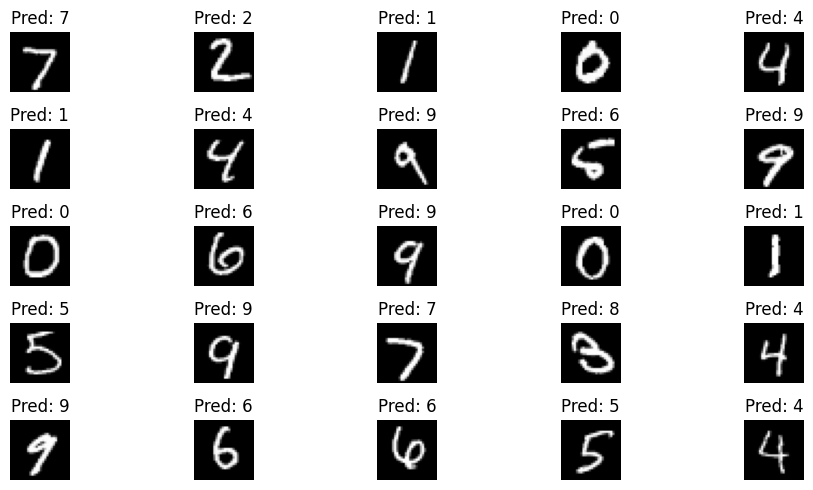

In [23]:
import numpy as np

predictions = model.predict(x_test[:25])

plt.figure(figsize=(10, 5))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title(f"Pred: {np.argmax(predictions[i])}")
    plt.axis("off")
plt.tight_layout()

plt.show()
